<a href="https://colab.research.google.com/github/SuhyeonHa/MatrixComputation/blob/master/Assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression with multiple variables

#### 1. Data

- load a set of data points $\{ (x^{(i)}, y^{(i)}, z^{(i)}, h^{(i)}) \}$ from the given CSV file ('data_train.csv') for training
- load a set of data points $\{ (x^{(i)}, y^{(i)}, z^{(i)}, h^{(i)}) \}$ from the given CSV file ('data_test.csv') for testing

#### 2. Linear Model

- $f_\theta(x, y, z) = \theta_0 + \theta_1 x + \theta_2 y + \theta_3 z$, where $\theta = (\theta_0, \theta_1, \theta_2, \theta_3)$ and $\theta_0, \theta_1, \theta_2, \theta_3 \in \mathbb{R}$

#### 3. Objective Function

- $J(\theta_0, \theta_1, \theta_2, \theta_3) = \frac{1}{2 m} \sum_{i=1}^m ( \theta_0 + \theta_1 x^{(i)} + \theta_2 y^{(i)} + \theta_3 z^{(i)} - h^{(i)} )^2$

#### 4. Gradient Descent
 
- $\theta_0^{(t+1)} := \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_\theta(x^{(i)}, y^{(i)}, z^{(i)}) - h^{(i)})$
- $\theta_1^{(t+1)} := \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_\theta(x^{(i)}, y^{(i)}, z^{(i)}) - h^{(i)}) x^{(i)}$
- $\theta_2^{(t+1)} := \theta_2^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_\theta(x^{(i)}, y^{(i)}, z^{(i)}) - h^{(i)}) y^{(i)}$
- $\theta_3^{(t+1)} := \theta_3^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_\theta(x^{(i)}, y^{(i)}, z^{(i)}) - h^{(i)}) z^{(i)}$
- you should choose a learning rate $\alpha$ in such a way that the convergence is achieved
- you can use any initial conditions $(\theta_0^{(0)}, \theta_1^{(0)}, \theta_2^{(0)}, \theta_3^{(0)})$
 
#### 5. Training

- find optimal parameters $(\theta_0, \theta_1, \theta_2, \theta_3)$ using the training dataset ('data_train.csv')

#### 6. Testing

- evaluate the inference using the testing dataset ('data_test.csv')
- use the objective function $J(\theta_0, \theta_1, \theta_2, \theta_3)$ for measuring the dissimilarity between the expected value and the inference using the testing data



## Maching Learning Lecture
 ~ 4

https://www.youtube.com/playlist?list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import csv

train_path = '/content/drive/My Drive/Colab Notebooks/MatrixComputation/data_train.csv'
test_path = '/content/drive/My Drive/Colab Notebooks/MatrixComputation/data_test.csv'

train_data = []
test_data = []

with open(train_path, newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 0
    for i in reader:
        # print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        train_data.append(i[0])
        train_data.append(i[1])
        train_data.append(i[2])
        train_data.append(i[3])
        ct += 1
    num_train = ct

with open(test_path, newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 0
    for i in reader:
        # print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        test_data.append(i[0])
        test_data.append(i[1])
        test_data.append(i[2])
        test_data.append(i[3])
        ct += 1
    num_test = ct

train_data = np.reshape(train_data, (num_train, 4))
test_data = np.reshape(test_data, (num_test, 4))

In [4]:
print(f'train_data {train_data.shape}')
print(f'train_data {train_data.shape}')
# print(f'train_data {train_data}')
# print(f'test_data {test_data}')

train_data (300, 4)
train_data (300, 4)


In [0]:
train_data = train_data.astype(np.float) # string to float
test_data = test_data.astype(np.float)
# print(f'train_data {train_data}')
# print(f'test_data {test_data}')

In [7]:
# data normalization #
x = train_data[:, 0]
y = train_data[:, 1]
z = train_data[:, 2]
h = train_data[:, 3]
print(f'x.shape {x.shape}')
print(f'y.shape {y.shape}')
print(f'z.shape {z.shape}')
print(f'h.shape {h.shape}')

x.shape (300,)
y.shape (300,)
z.shape (300,)
h.shape (300,)


In [0]:
# linear regression #
# x, y, num, theta0, theta1 -> x, y, z, num, theta0, theta1, theta2, theta3, h
# x = i[0] y = i[1] z = i[2] h = i[3]

In [0]:
def pred(x, y, z, theta0, theta1, theta2, theta3):
  h_hat = theta0 + theta1*x + theta2*y + theta3*z
  return h_hat

In [0]:
def ObjFnc(num, h, h_hat): # L2-norm between h_hat and h
  total = 0
  diff = h - h_hat
  sqr = diff ** 2
  for i in range(num):
    total += sqr[i]
  result = total/(2*num)
  return result

In [0]:
# hyper parameters #
theta0 = 0 # parameter initilization
theta1 = 0
theta2 = 0
theta3 = 0
itr = 3000 # step_size
lr = 1e-6 # learning_rate

cost_list = []
theta0_list = []
theta1_list = []
theta2_list = []
theta3_list = []

In [126]:
for i in range(itr): # gradient descent
  h_hat_prev = pred(x, y, z, theta0, theta1, theta2, theta3)
  # print(h_hat_prev)
  cost_prev = ObjFnc(num_train, h, h_hat_prev)
  cost_list.append(cost_prev)
  theta0_list.append(theta0)
  theta1_list.append(theta1)
  theta2_list.append(theta2)
  theta3_list.append(theta3)

  grad_zero = np.sum(h_hat_prev - h) / num_train
  grad_one = np.sum((h_hat_prev - h)*x) / num_train
  grad_two = np.sum((h_hat_prev - h)*y) / num_train
  grad_three = np.sum((h_hat_prev - h)*z) / num_train

  temp0 = theta0 - lr*grad_zero
  temp1 = theta1 - lr*grad_one
  temp2 = theta2 - lr*grad_two
  temp3 = theta3 - lr*grad_three
  h_hat_next = pred(x, y, z, temp0, temp1, temp2, temp3)
  cost_next = ObjFnc(num_train, h, h_hat_next)

  if(cost_prev < cost_next): # repeat until convergence cost_prev < cost_next
    break
  else:
    theta0 = temp0
    theta1 = temp1
    theta2 = temp2
    theta3 = temp3

final_step = i
print(f'final_step {final_step}')
print(f'final_cost {cost_prev}')
print(f'cost {cost_list}')
#print(f'theta0 {theta0_list}')
#print(f'theta1 {theta1_list}')

final_step 2999
final_cost 486.58297701235074
cost [135990.52842295787, 112821.14877297971, 93620.17436768589, 77707.90179807667, 64521.04639204019, 53592.8021609127, 44536.3170530745, 37030.998545128794, 30811.16479403624, 25656.63960550212, 21384.95828423686, 17844.908456288154, 14911.177211122531, 12479.915074415076, 10465.059777947328, 8795.289689529334, 7411.499055576638, 6264.705680932935, 5314.31697863617, 4526.693008479164, 3873.9556365010517, 3333.001660129046, 2884.6849639929437, 2513.1387550532813, 2205.213884436218, 1950.013372791382, 1738.506661555431, 1563.2099347693968, 1417.9211949692751, 1297.5007149417143, 1197.6890934242151, 1114.9564739940113, 1046.3775895541992, 989.5282090416465, 942.3993206112725, 903.3260134155854, 870.928540422711, 844.0634759201133, 821.7832386990813, 803.3025480567643, 787.9706251716046, 775.2481557918801, 764.6881987257065, 755.9203643006367, 748.6377027166038, 742.5858381451296, 737.5539639262216, 733.3673800965175, 729.8813090801247, 726.9

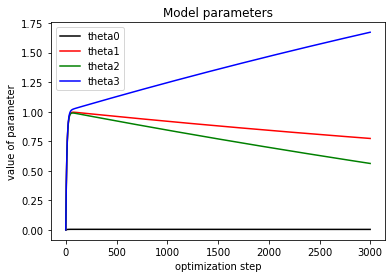

In [127]:
plt.plot(range(final_step+1), theta0_list, c='k')
plt.plot(range(final_step+1), theta1_list, c='r')
plt.plot(range(final_step+1), theta2_list, c='g')
plt.plot(range(final_step+1), theta3_list, c='b')
plt.xlabel('optimization step')
plt.ylabel('value of parameter')
plt.title('Model parameters')
plt.legend(['theta0', 'theta1', 'theta2', 'theta3'])
plt.show()

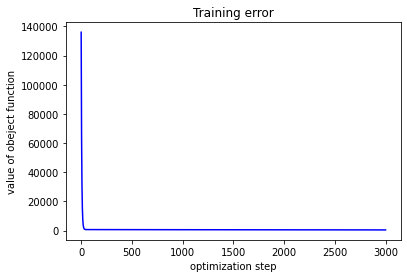

In [128]:
plt.plot(range(final_step+1), cost_list, c='b')
plt.xlabel('optimization step')
plt.ylabel('value of obeject function')
plt.title('Training error')
plt.show()

In [0]:
new_a = theta0
new_b = theta1
print(f'new_a {new_a}')
print(f'new_b {new_b}')
new_y = theta0*x + theta1
# print(f'new_y {new_y}')

new_a 1.8471117184659223
new_b 1.8381456471949182


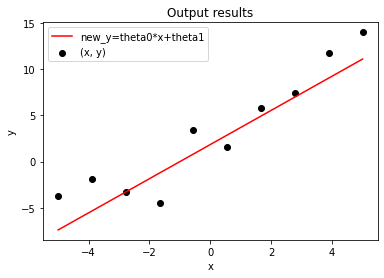

In [0]:
plt.plot(x, new_y, c='r')
plt.scatter(x, y, c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Output results')
plt.legend(['new_y=theta0*x+theta1', '(x, y)'])
plt.show()